# Análise Exploratória IMDB

### 1. Manipulação

#### 1.1 Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

#### 1.2 Coleta

In [62]:
df = pd.read_csv('imdb_movies_shows.csv')
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


#### 1.3 Análise Preliminar

Verificando Valores Nulos

In [63]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [64]:
# Eliminando o único valor nulo da coluna "Title"
df.dropna(subset='title',inplace=True)

In [65]:
df[df['seasons'].isnull()].head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
6,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0


In [66]:
# Substituindo valores nulos das colunas "imdb_score" e "imdb_votes" pela média de seus valores
df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace=True)
df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)

In [67]:
# Excluindo colunas que não serão usadas
df.drop(columns= ['age_certification', 'seasons', 'imdb_id'], inplace=True)

In [68]:
df.isnull().sum()

title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
dtype: int64

Verificando Valores Duplicados

In [69]:
# Verificando Duplicados
df.duplicated().sum()

0

Resumo dos dados

In [70]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5805.000000,5805.000000,5805.000000,5.805000e+03
mean,2016.013609,77.655469,6.533447,2.340719e+04
std,7.325502,39.467866,1.107496,8.299768e+04
min,1945.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,5.900000,6.080000e+02
50%,2018.000000,84.000000,6.533447,3.020000e+03
75%,2020.000000,105.000000,7.300000,2.019400e+04
max,2022.000000,251.000000,9.600000,2.268288e+06


### 2. Análise dos Dados

#### 2.1 Quais foram os anos com mais lançamentos de filmes e shows ?

Text(0.5, 0, '')

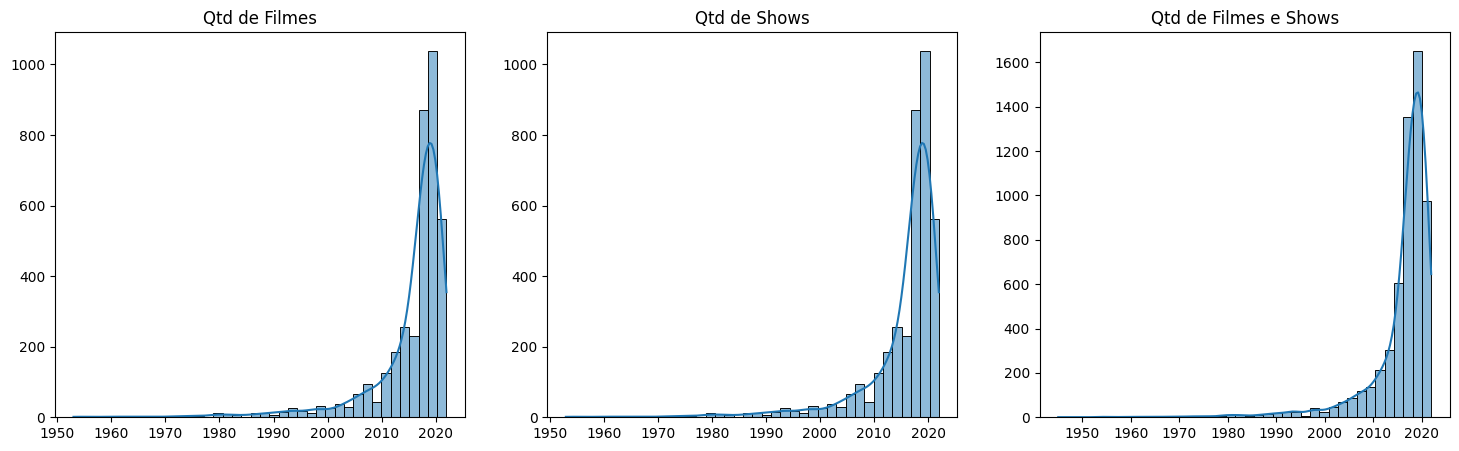

In [82]:
# Filme
filme = df.query('type == "MOVIE"') # Filtro

# Show
show = df.query('type == "SHOW"') # Filtro

# Subplots
fig, ax = plt.subplots(1,3, figsize=(18,5))

# Grafico 1 (Filme)
sns.histplot(filme['release_year'], bins=40, kde=True, ax = ax[0])
ax[0].set_title('Qtd de Filmes')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Grafico 2 (Show)
sns.histplot(filme['release_year'], bins=40, kde=True, ax = ax[1])
ax[1].set_title('Qtd de Shows')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

# Grafico 3 (Ambos)
sns.histplot(df['release_year'], bins=40, kde=True, ax = ax[2])
ax[2].set_title('Qtd de Filmes e Shows')
ax[2].set_ylabel('')
ax[2].set_xlabel('')


Conclusões: 
- Houve variações de ano a ano, com aumentos consideráveis a partir de 2010 e uma queda brusca em 2022

#### 2.2 Quais são os generos mais Lançados ?

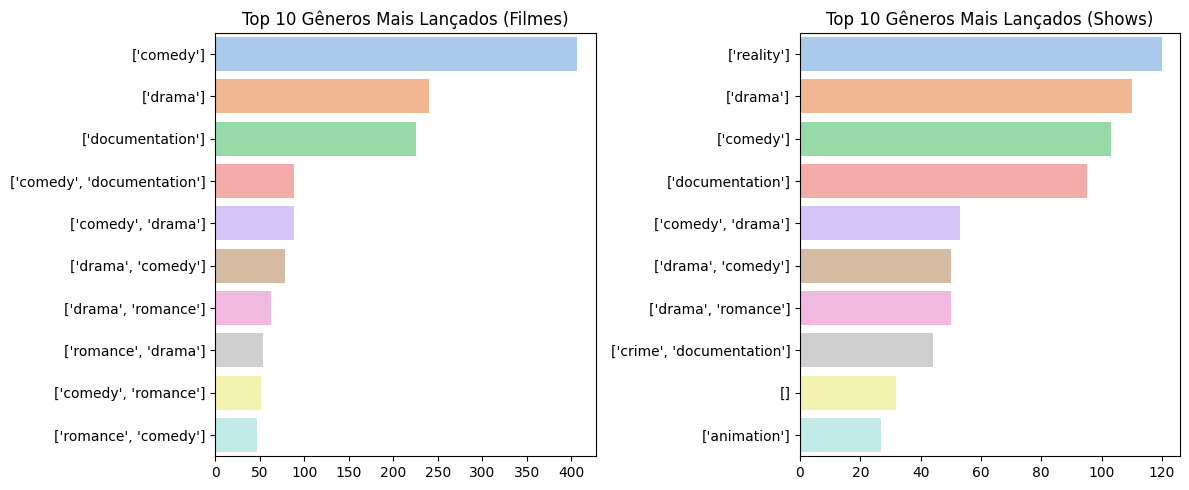

In [72]:
# Filme
filme = df.query('type == "MOVIE"') # Filtro
dados = filme[['genres']].groupby('genres').value_counts().sort_values(ascending=False) # Calculo
dados = dados.nlargest(10) # Top 10

# Show
show = df.query('type == "SHOW"') # Filtro
dados1 = show[['genres']].groupby('genres').value_counts().sort_values(ascending=False) # Calculo
dados1 = dados1.nlargest(10) # Top 10

# Subplots
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Grafico 1 (Filme)
sns.barplot(x=dados.values, y=dados.index, palette='pastel', ax=ax[0])
ax[0].set_title('Top 10 Gêneros Mais Lançados (Filmes)')
ax[0].set_ylabel('')

# Grafico 2 (Show)
sns.barplot(x=dados1.values, y=dados1.index, palette='pastel', ax=ax[1])
ax[1].set_title('Top 10 Gêneros Mais Lançados (Shows)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


Conclusões: 
- Entre os filmes, os gêneros "Comedy", "Drama", "Documentation" são os mais lançados
- Entre os Shows, "Reality", "Comedy", "Drama", "Documentation", são os mais lançados
- No Geral, Comédia, Drama e Documentário são os generos mais lançados, tanto em filme quanto em show 

#### 2.3 Quais são os 3 países que mais lançam filmes/séries?

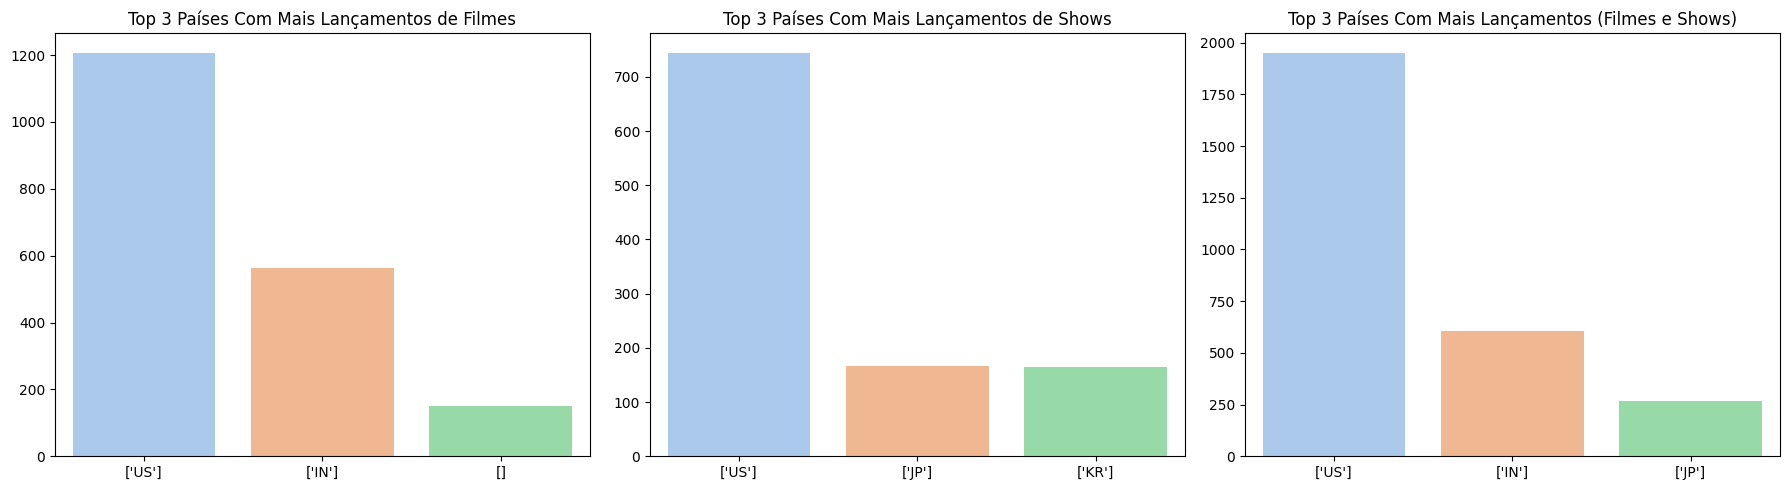

In [73]:
# Filme
filme = df.query('type == "MOVIE"') # Filtro
dados = filme[['production_countries']].groupby('production_countries').value_counts().sort_values(ascending=False) # Calculo
dados = dados.nlargest(3) # Top 3

# Show
show = df.query('type == "SHOW"') # Filtro
dados1 = show[['production_countries']].groupby('production_countries').value_counts().sort_values(ascending=False) # Calculo
dados1 = dados1.nlargest(3) # Top 3

# Ambos
dados2 = df[['production_countries']].groupby('production_countries').value_counts().sort_values(ascending=False) # calculo
dados2 = dados2.nlargest(3) # Top 3

# Subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Grafico 1 (Filme)
sns.barplot(x=dados.index, y=dados.values, palette='pastel', ax=ax[0])
ax[0].set_title('Top 3 Países Com Mais Lançamentos de Filmes')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Grafico 2 (Show)
sns.barplot(x=dados1.index, y=dados1.values, palette='pastel', ax=ax[1])
ax[1].set_title('Top 3 Países Com Mais Lançamentos de Shows')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

# Grafico 3 (Ambos)
sns.barplot(x=dados2.index, y=dados2.values, palette='pastel', ax=ax[2])
ax[2].set_title('Top 3 Países Com Mais Lançamentos (Filmes e Shows)')
ax[2].set_ylabel('')
ax[2].set_xlabel('')

plt.tight_layout()
plt.show()


Conclusões: 
- Estados Unidos se destaca disparadamente no lançamento de filmes e shows
- Destaque também para India, sendo o segundo pais a lançar mais filmes
- No lançamento de shows, o Japão e a Coréia do Sul também tem uma quantidade de lançamentos relevantes

#### 2.4 Há uma correlação entre a duração do filme e sua pontuação no IMDB?

Aqui utilizaremos a correlação de Pearson

Filmes

In [74]:
filme = df.query('type == "MOVIE"') # Filtro

dados = filme[['runtime', 'imdb_score']].dropna() # Excluindo valores nulos para evitar erros no calculo

# Calculando correlacao de Pearson
correlacao, p_valor = pearsonr(dados['runtime'], dados['imdb_score'])
print(correlacao)

0.07019635388990701


Shows

In [75]:
filme = df.query('type == "SHOW"') # Filtro

dados = filme[['runtime', 'imdb_score']].dropna() # Excluindo valores nulos para evitar erros no calculo

# Calculando correlacao de Pearson
correlacao, p_valor = pearsonr(dados['runtime'], dados['imdb_score'])
print(correlacao)

0.1962635632016018


Conclusões: Ambas correlações são fracas, porém positivas. No caso dos shows (séries), pode haver possibilidade do tempo de duração influenciar no Score, mas é incerto.